## 이진화
- 이진화란 이미지의 픽셀을 두가지 분류로 나누는 작업을 의미한다.
- 이진화는 기본적으로 각 필셀의 값을 이용한다.
그레이스케일 영상에 대해서 이진화를 수행하려면 픽셀 값이 임계값(Threshold)보다 크면 255로 설정하고
작으면 0으로 설정한다.
- OpenCV는 `threshold()` 함수를 이용해 이진화를 수행할 수 있다.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('img/baltan.jpg', cv2.IMREAD_GRAYSCALE)

border, binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

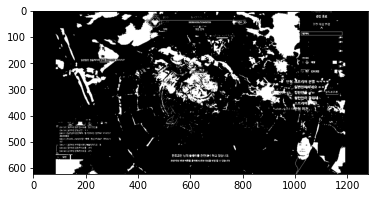

In [3]:
plt.imshow(binary, cmap=plt.cm.gray)

### 적응형 이진화
- `threshold()` 함수는 이미지 전체에 적용한다.
- 부분적으로 다른 이진화를 적용하는 것을 적응영 이진화 라고 하는데, 불균일한 조명이 있는 이미지에서 사용될 수 있다.
- 적응형 이진화 기법은 영상의 모든 픽셀에서 정해진 크기의 사각형 블록 영역을 설정하고 블록 영역 내부의 픽셀 값 분포로부터 고유의 임계값을 설정해서 진화를 한다.

In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('img/baltan.jpg', cv2.IMREAD_GRAYSCALE)

binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 5)

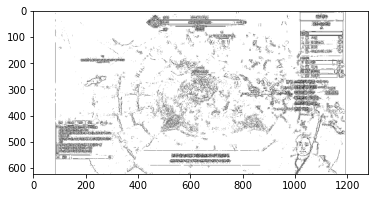

In [6]:
plt.imshow(binary, cmap=plt.cm.gray)

- 모폴로지 연산은 영상 내부 객체의 형태와 구조를 분석하고 처리하는 기법이다.
- 모폴로지 연산은 그레이스케일 영상과 이진 영상에 모두 적용이 가능하지만 주록 이진화된 영상에서 객체의 모양을 변형하는 용도로 사용된다.
- 객체의 모양을 단순화시키거나 노이즈를 제거할 수 있다.


1. 침식(Erosion): 객체 영역의 외곽을 골로구 깍아내어 객체 영역은 축소되고 배경은 확대된다.
2. 팽창(Dilation): 구조 요소를 영상 전체에 스캔하면서 구조요소가 객체 역역 내부에 완전히 포함될 경우 고정점 위치 픽셀을 255로 설정. 이진 영상의 팽창 연산은 객체 외곽을 확대하는 연산이다.
3. 열기 연산은 erode연산을 수행하고 dilate 연산을 적용해 주는 것이고 닫기는 dilate 연산을 수행하고 erode 연산을 적용해 주는 것이다.

In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('img/water.jpg', cv2.IMREAD_GRAYSCALE)

border, binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
dst1 = cv2.erode(binary, (5,5))
dst2 = cv2.dilate(binary, (5,5))
dst3 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, (5,5))
dst4 = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, (5,5))

In [9]:
cv2.imshow('dst', binary)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)
cv2.waitKey(0)
cv2.destroyAllWindows()